### 1) Exploratory Data Analysis(EDA) – 2p
a. Describe the structure of the data: number of rows, columns, and data types.   
b. Identify correlations between data   
c. Make plots to show data distributions 
d. Identify target and feature variables   
e. Highlight potential issues in the Data   

In [47]:
# LAB 8 - TASK 1: EDA
# Cell 1: Imports and data loading (based on previous labs)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()  # similar plotting style as in previous labs

# Load the dataset (make sure data.csv is in the same folder as this notebook)
data = pd.read_csv("data.csv")

print("Dataset loaded. Shape:", data.shape)

Dataset loaded. Shape: (100000, 43)


In [48]:
# 1a) Describe the structure of the data: number of rows, columns, and data types

# Number of rows and columns
print("Shape (rows, columns):", data.shape)

# Data types and non-null counts
print("\n=== Data Info ===")
data.info()

# List numeric and categorical columns
numeric_cols = data.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = data.select_dtypes(include=["object"]).columns

print("\nNumeric columns:")
print(list(numeric_cols))

print("\nCategorical columns:")
print(list(categorical_cols))

# Quick statistical summary for numeric columns
print("\n=== Numeric Summary ===")
print(data[numeric_cols].describe())

# Quick summary for categorical columns
print("\n=== Categorical Summary ===")
print(data[categorical_cols].describe().T.iloc[:, :5])

Shape (rows, columns): (100000, 43)

=== Data Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 43 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          100000 non-null  object 
 1   Project_Grade                 100000 non-null  float64
 2   Enrollment_Date               100000 non-null  object 
 3   Procrastination_Index         100000 non-null  float64
 4   Completed                     75000 non-null   object 
 5   Notifications_Checked         100000 non-null  int64  
 6   Average_Session_Duration_Min  100000 non-null  float64
 7   Discussion_Participation      100000 non-null  int64  
 8   Age                           100000 non-null  int64  
 9   Payment_Amount                100000 non-null  int64  
 10  Peer_Interaction_Score        90685 non-null   float64
 11  App_Usage_Percentage          100000 non-null  int

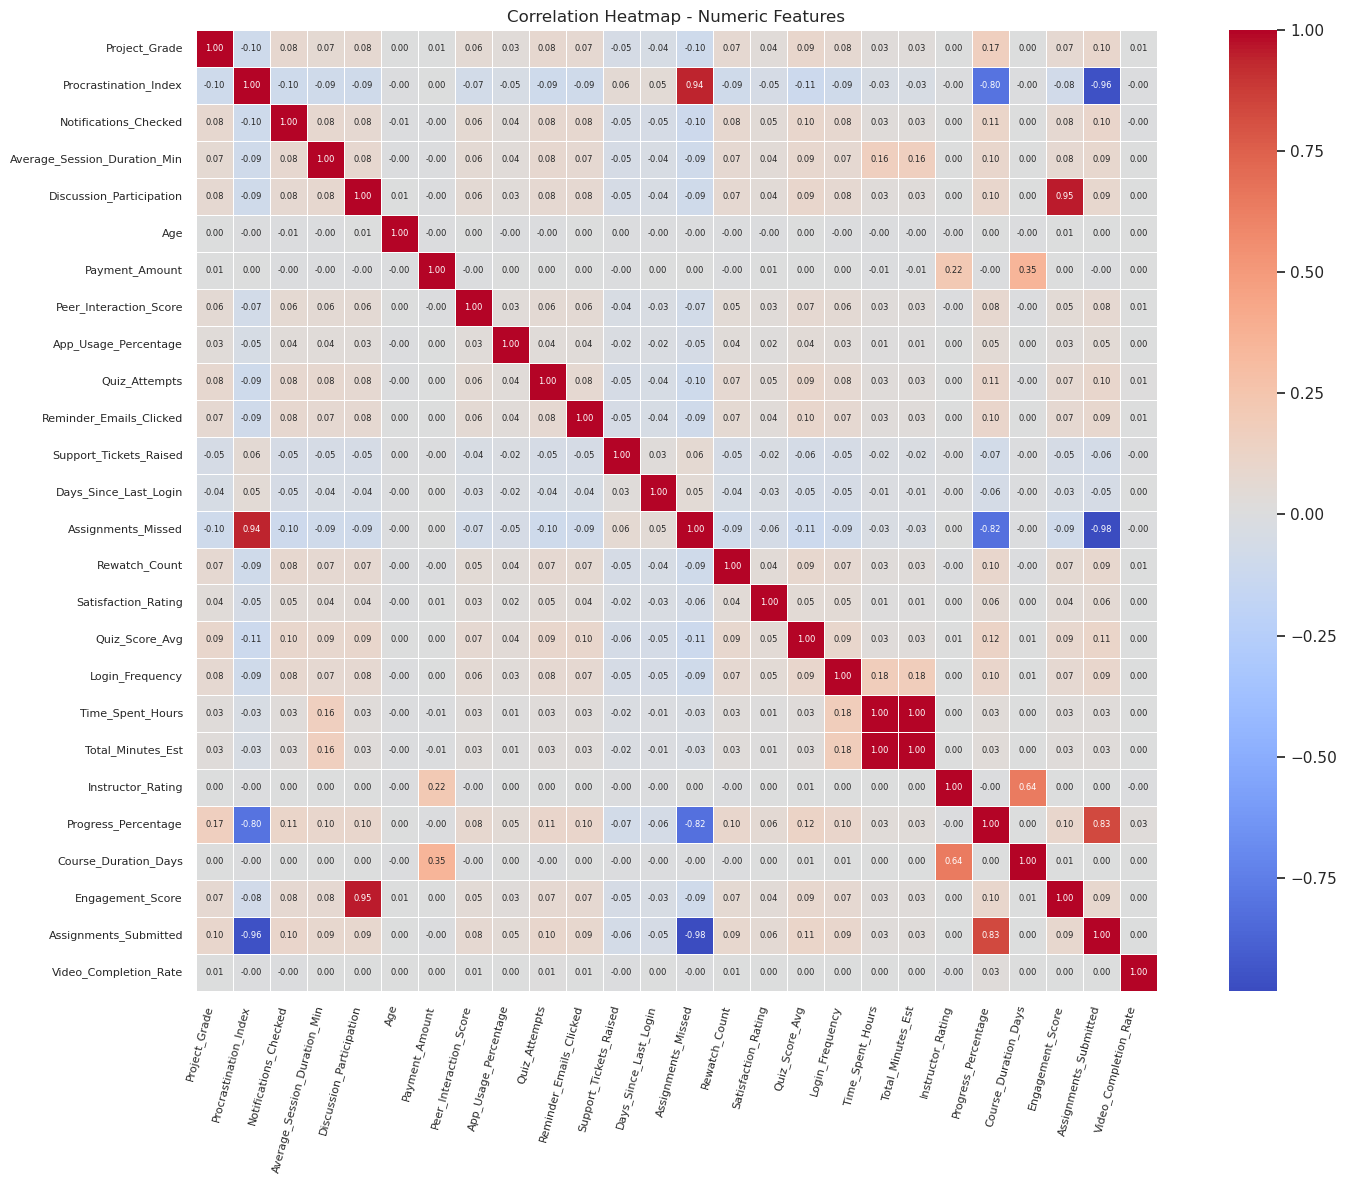

In [49]:
# 1b) Identify correlations between data (numeric features)
# Keep values on the heatmap, but make it readable.

corr_matrix = data[numeric_cols].corr()

plt.figure(figsize=(16, 12))  # bigger figure so cells are larger
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    annot=True,          # show the numbers (like in the lab)
    fmt=".2f",           # 2 decimal places
    square=True,
    linewidths=0.5,
    annot_kws={"size": 6}  # smaller font for the numbers
)

plt.title("Correlation Heatmap - Numeric Features")
plt.xticks(rotation=75, ha="right", fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()


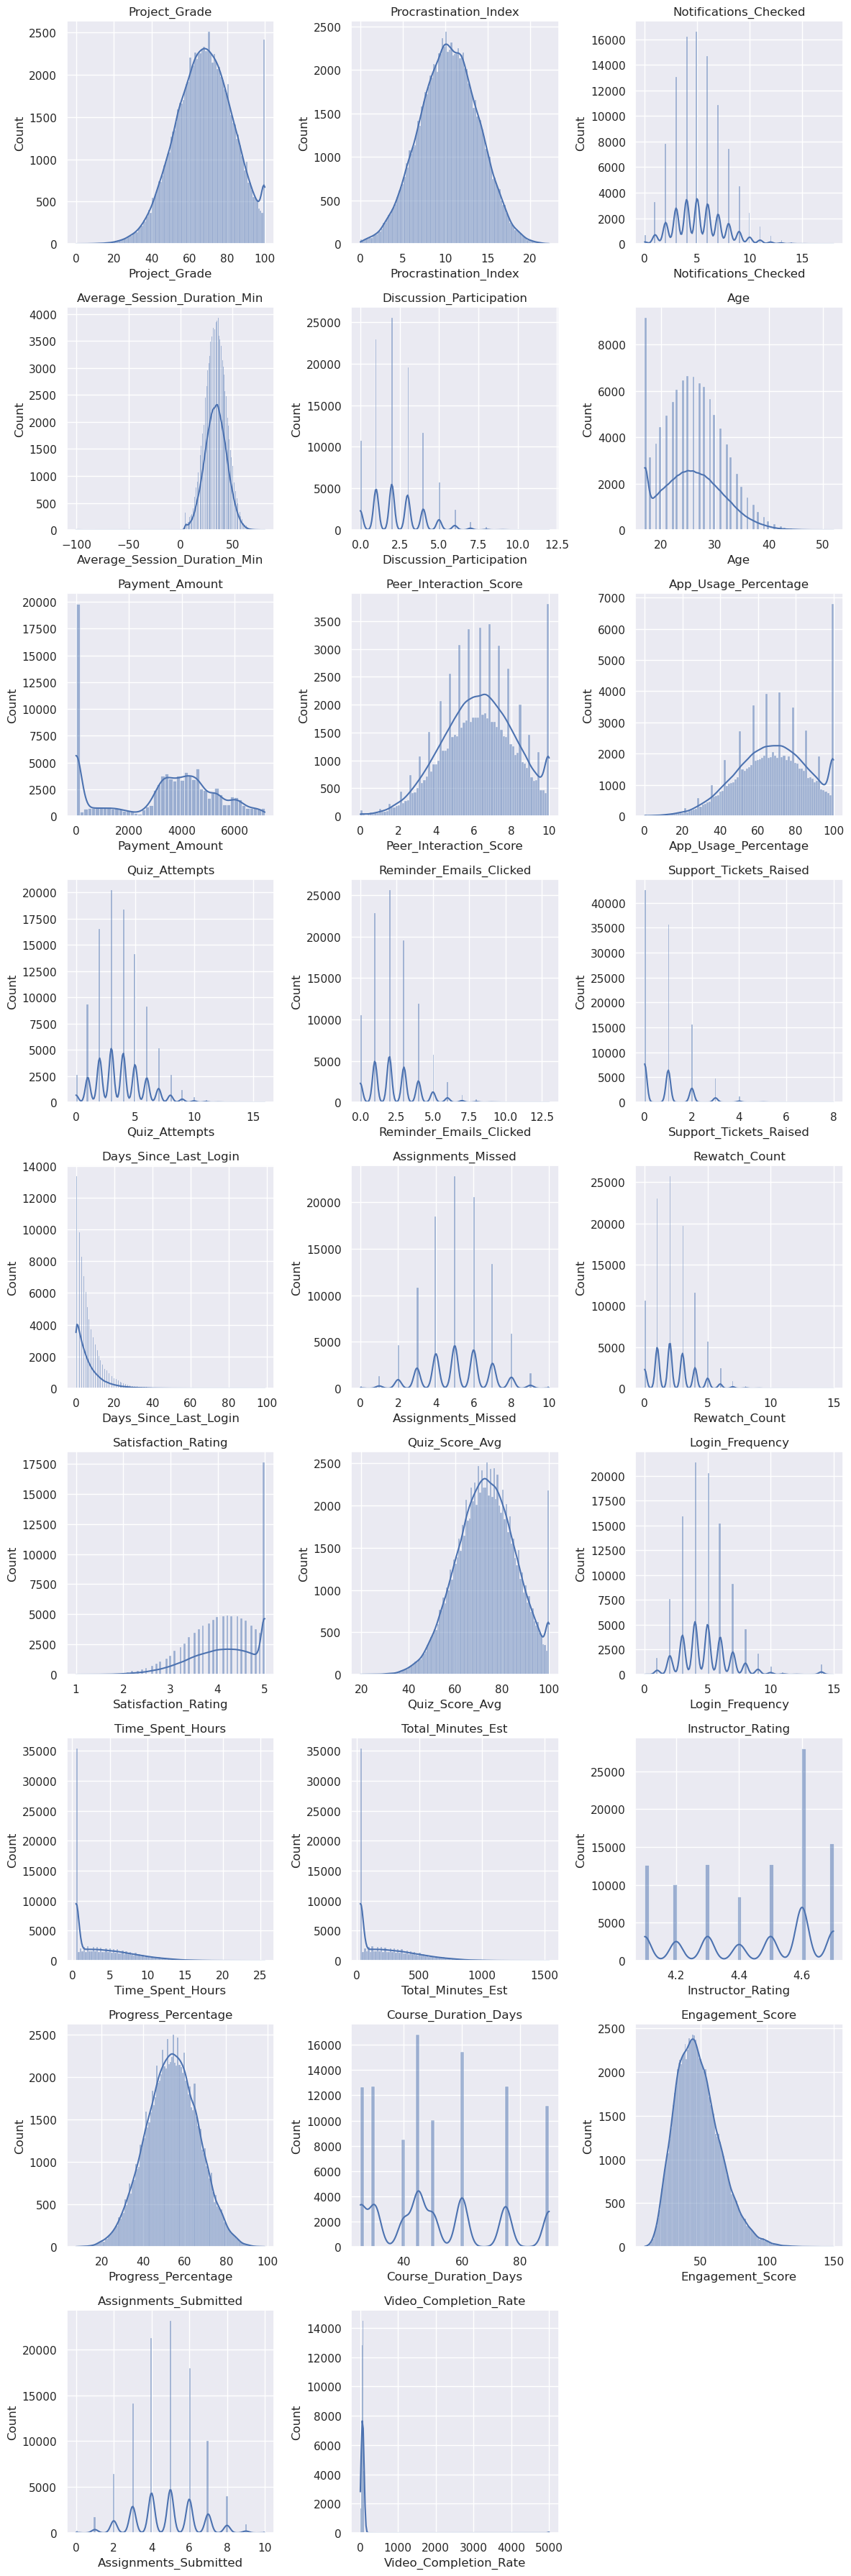

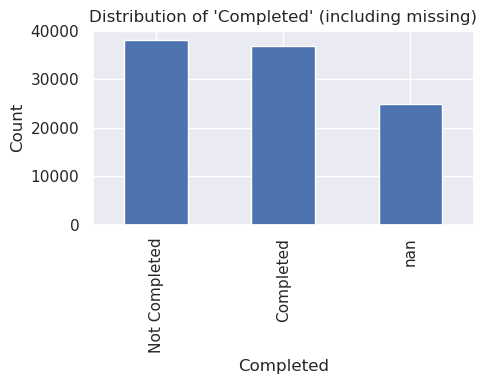

In [50]:
# 1c) Make plots to show data distributions
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# use ALL numeric columns, like "columns" in the lab
columns = list(numeric_cols)

# -------- Histograms with KDE (exact same style as lab) --------
n_cols = 3
n_rows = int(np.ceil(len(columns) / n_cols))

plt.figure(figsize=(12, 4 * n_rows))
for i, col in enumerate(columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(x=col, data=data, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()


# -------- Bar plot for the target 'Completed' --------
if "Completed" in data.columns:
    plt.figure(figsize=(5, 4))
    data["Completed"].value_counts(dropna=False).plot(kind="bar")
    plt.title("Distribution of 'Completed' (including missing)")
    plt.xlabel("Completed")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


In [51]:
# 1d) Identify target and feature variables

# Target variable
target_col = "Completed"

# ID / non-predictive columns (similar idea to dropping index columns in previous labs)
id_columns = ["Student_ID", "Name"]

feature_cols = [col for col in data.columns
                if col not in id_columns + [target_col]]

print("Target column:")
print(target_col)

print("\nFeature columns:")
print(feature_cols)

Target column:
Completed

Feature columns:
['Project_Grade', 'Enrollment_Date', 'Procrastination_Index', 'Notifications_Checked', 'Average_Session_Duration_Min', 'Discussion_Participation', 'Age', 'Payment_Amount', 'Peer_Interaction_Score', 'App_Usage_Percentage', 'Quiz_Attempts', 'Reminder_Emails_Clicked', 'Fee_Paid', 'Device_Type', 'Support_Tickets_Raised', 'Days_Since_Last_Login', 'Course_Name', 'Assignments_Missed', 'Rewatch_Count', 'Gender', 'Satisfaction_Rating', 'Quiz_Score_Avg', 'Discount_Used', 'Login_Frequency', 'Time_Spent_Hours', 'Total_Minutes_Est', 'Internet_Connection_Quality', 'Course_Level', 'Employment_Status', 'Instructor_Rating', 'Progress_Percentage', 'Education_Level', 'Course_Duration_Days', 'Course_ID', 'Engagement_Score', 'Assignments_Submitted', 'City', 'Video_Completion_Rate', 'Category', 'Payment_Mode']


In [52]:
# 1e) Highlight potential issues in the data

# 1) Missing values per column
print("=== Missing Values Per Column ===")
missing_values = data.isna().sum().sort_values(ascending=False)
print(missing_values)

# 2) Class balance in target (including NaN)
if "Completed" in data.columns:
    print("\n=== 'Balance in Completed Column ===")
    print(data["Completed"].value_counts(dropna=False))

# 3) Check for duplicate rows
num_duplicates = data.duplicated().sum()
print("\nNumber of duplicate rows:", num_duplicates)


=== Missing Values Per Column ===
Completed                       25000
Peer_Interaction_Score           9315
Device_Type                      8661
Internet_Connection_Quality      8534
Days_Since_Last_Login            7472
City                             5443
Procrastination_Index               0
Enrollment_Date                     0
Project_Grade                       0
Notifications_Checked               0
Name                                0
Payment_Amount                      0
Age                                 0
Discussion_Participation            0
Average_Session_Duration_Min        0
Fee_Paid                            0
Reminder_Emails_Clicked             0
App_Usage_Percentage                0
Quiz_Attempts                       0
Assignments_Missed                  0
Rewatch_Count                       0
Gender                              0
Satisfaction_Rating                 0
Quiz_Score_Avg                      0
Discount_Used                       0
Support_Tickets_

### 2) Data preprocessing – 2 p
a. Identify outliers  
b. Deal with missing values  
c. Deal with categorical data   
d. Standardize or normalize numerical features as needed   
e. Use principal component analysis(PCA)   


In [53]:
# Task 2 - Common setup (run this once)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Make plots look nicer (like in labs)
sns.set(style="whitegrid")

# Load the same dataset
data = pd.read_csv("data.csv")

# Target and feature columns
target_col = "Completed"
feature_cols = [c for c in data.columns if c != target_col]

# Initial numeric / categorical split (for features only)
numeric_cols = data[feature_cols].select_dtypes(include=["number"]).columns
categorical_cols = data[feature_cols].select_dtypes(include=["object", "category"]).columns

print("Number of rows:", data.shape[0])
print("Number of columns:", data.shape[1])
print("Numeric feature columns:", list(numeric_cols))
print("Categorical feature columns:", list(categorical_cols))


Number of rows: 100000
Number of columns: 43
Numeric feature columns: ['Project_Grade', 'Procrastination_Index', 'Notifications_Checked', 'Average_Session_Duration_Min', 'Discussion_Participation', 'Age', 'Payment_Amount', 'Peer_Interaction_Score', 'App_Usage_Percentage', 'Quiz_Attempts', 'Reminder_Emails_Clicked', 'Support_Tickets_Raised', 'Days_Since_Last_Login', 'Assignments_Missed', 'Rewatch_Count', 'Satisfaction_Rating', 'Quiz_Score_Avg', 'Login_Frequency', 'Time_Spent_Hours', 'Total_Minutes_Est', 'Instructor_Rating', 'Progress_Percentage', 'Course_Duration_Days', 'Engagement_Score', 'Assignments_Submitted', 'Video_Completion_Rate']
Categorical feature columns: ['Name', 'Enrollment_Date', 'Fee_Paid', 'Device_Type', 'Course_Name', 'Gender', 'Discount_Used', 'Internet_Connection_Quality', 'Course_Level', 'Employment_Status', 'Student_ID', 'Education_Level', 'Course_ID', 'City', 'Category', 'Payment_Mode']


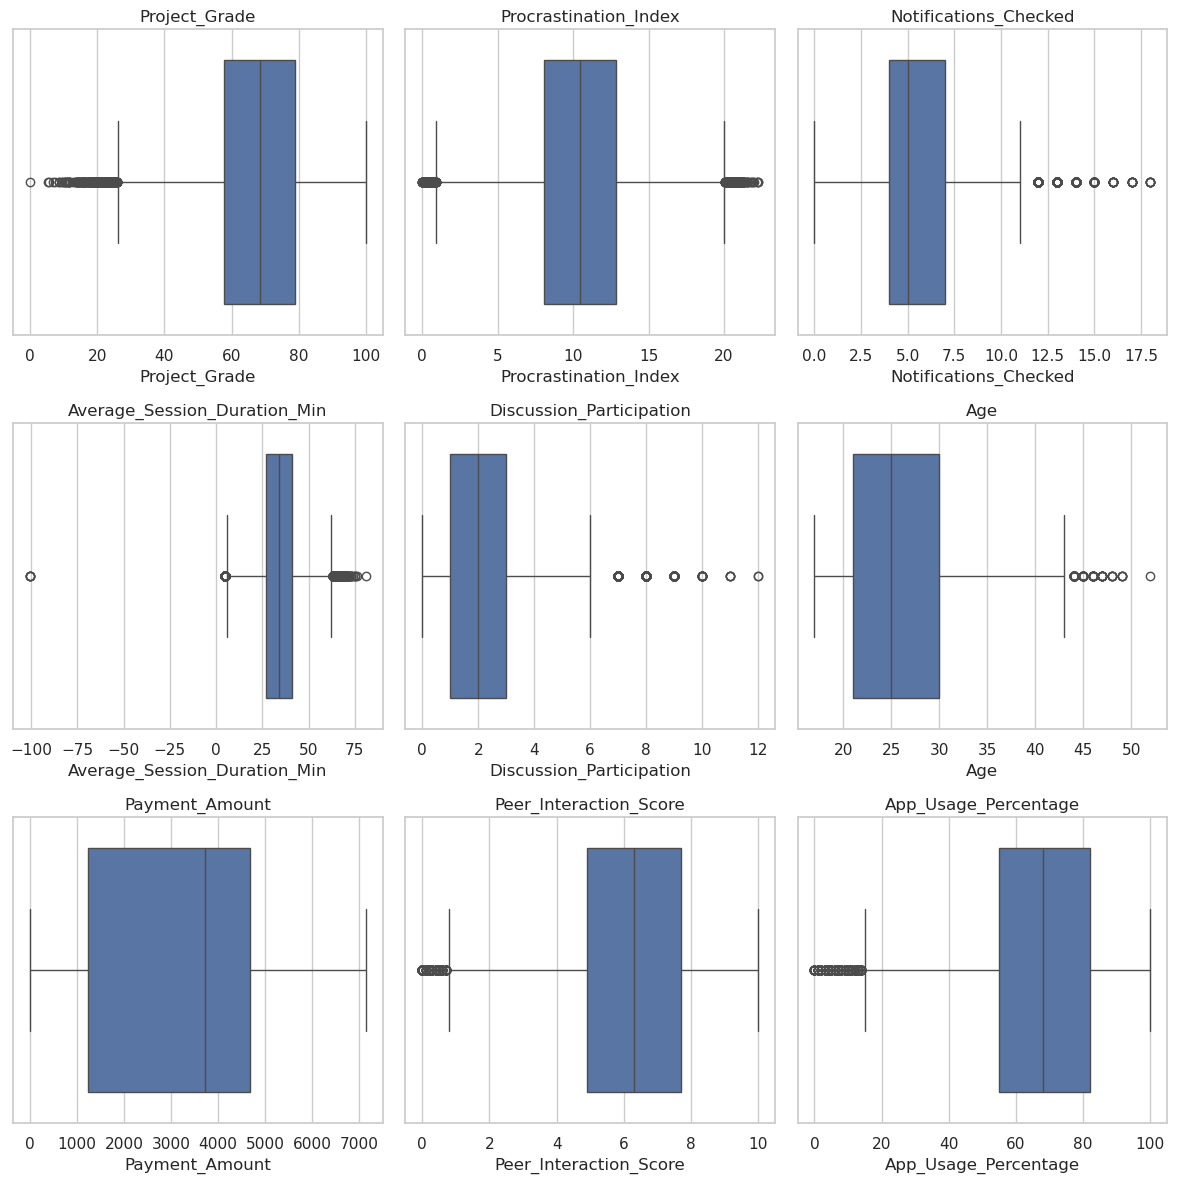

In [54]:
# 2a) Identify outliers using boxplots on numeric features
# (same style as Lab7: a grid of boxplots)

plt.figure(figsize=(12, 12))

# Use the first 9 numeric columns so the grid is 3x3 (lab style)
numeric_for_outliers = list(numeric_cols[:9])

for i, col in enumerate(numeric_for_outliers):
    plt.subplot(3, 3, i + 1)  # subplot on which our boxplot is drawn for identifying outlier
    sns.boxplot(x=col, data=data)
    plt.title(col)

plt.tight_layout()
plt.show()


In [55]:
# 2b) Deal with missing values

# 1) See how many missing values we have in each column
print("Missing values before imputation:")
print(data.isna().sum().sort_values(ascending=False))

# 2) Fill missing values in NUMERIC features with the median (Lab7 style: stroke_df['bmi'].fillna(median))
for col in numeric_cols:
    if data[col].isna().sum() > 0:
        median_val = data[col].median()
        print(f"Filling numeric NaNs in '{col}' with median:", median_val)
        data[col].fillna(median_val, inplace=True)

# 3) Fill missing values in CATEGORICAL features (EXCEPT the target 'Completed') with the mode
for col in categorical_cols:
    if data[col].isna().sum() > 0:
        mode_val = data[col].mode().iloc[0]
        print(f"Filling categorical NaNs in '{col}' with mode:", mode_val)
        data[col].fillna(mode_val, inplace=True)

print("\nMissing values AFTER imputation (note: 'Completed' can still be missing):")
print(data.isna().sum().sort_values(ascending=False))


Missing values before imputation:
Completed                       25000
Peer_Interaction_Score           9315
Device_Type                      8661
Internet_Connection_Quality      8534
Days_Since_Last_Login            7472
City                             5443
Procrastination_Index               0
Enrollment_Date                     0
Project_Grade                       0
Notifications_Checked               0
Name                                0
Payment_Amount                      0
Age                                 0
Discussion_Participation            0
Average_Session_Duration_Min        0
Fee_Paid                            0
Reminder_Emails_Clicked             0
App_Usage_Percentage                0
Quiz_Attempts                       0
Assignments_Missed                  0
Rewatch_Count                       0
Gender                              0
Satisfaction_Rating                 0
Quiz_Score_Avg                      0
Discount_Used                       0
Support_Tickets_

/tmp/ipykernel_145695/676229483.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(median_val, inplace=True)
/tmp/ipykernel_145695/676229483.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

### Choice of which categorical features to drop

I want to remove features that are either pure identifiers, very high cardinality with little general meaning.

Here is how I think about each of the features I mentioned:

- **Name**  
  This is a pure identifier of the person. It does not generalize and it is not something I can use to explain why a student completed a course. I drop it.

- **Student_ID**  
  This is also a pure identifier. It only distinguishes one student from another and does not contain general behaviour patterns. I drop it.

- **Enrollment_Date**  
  This is effectively a timestamp of when the student joined. It can be useful if I engineer features such as seasonality or time since enrollment, but as a raw categorical value it is very high cardinality and not very meaningful. I drop it.

- **Course_Name and Course_ID**  
  These two columns essentially describe the same thing, the course that the student is taking. Keeping both would be redundant.  
  I choose to **drop `Course_Name` and keep `Course_ID`**, and I will encode `Course_ID` as a categorical feature. This way I still let the model learn course specific patterns without doubling the number of features.

- **Payment_Mode**  
  The way someone pays is not really about their learning behaviour. It might correlate with marketing campaigns or pricing, but it is not central to the educational outcome and it might overfit to patterns that will not hold in the future. I drop it.

- **Fee_Paid**  
  Whether the fee is paid is extremely close to the outcome I want to predict. In some platforms, a student cannot complete the course without paying, so this feature can leak information about the target and make the prediction task too easy and unrealistic. To avoid this kind of leakage and to force the model to rely on engagement and profile features instead, I drop `Fee_Paid`.

After these choices, I am left with features that describe the student profile, course characteristics in a general way, and engagement behaviour, without obvious identifiers or strong leakage of the target.


In [ ]:
# 2c) Deal with categorical data

# Drop ID-like columns that don't really help the model (similar to dropping index in lab)
cols_to_drop = ["Name", "Student_ID", "Course_Name", "Enrollment_Date", "Fee_Paid", "Payment_Mode"]
cols_to_drop = [c for c in cols_to_drop if c in data.columns]  # just in case

print("Dropping ID / text columns:", cols_to_drop)
data = data.drop(columns=cols_to_drop)

# Recompute feature / numeric / categorical columns after dropping
feature_cols = [c for c in data.columns if c != target_col]
numeric_cols = data[feature_cols].select_dtypes(include=["number"]).columns
categorical_cols = data[feature_cols].select_dtypes(include=["object"]).columns

print("Numeric features:", list(numeric_cols))
print("Categorical features (to be encoded):", list(categorical_cols))

# One-hot encode categorical feature columns (Lab7 example: stroke_one_hot_df = pd.get_dummies(stroke_df))
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)


print("Shape BEFORE encoding:", data.shape)
print("Shape AFTER encoding:", data_encoded.shape)
print("Example columns after one-hot encoding:")
print(list(data_encoded.columns)[:20])


Dropping ID / text columns: []
Numeric features: ['Project_Grade', 'Procrastination_Index', 'Notifications_Checked', 'Average_Session_Duration_Min', 'Discussion_Participation', 'Age', 'Payment_Amount', 'Peer_Interaction_Score', 'App_Usage_Percentage', 'Quiz_Attempts', 'Reminder_Emails_Clicked', 'Support_Tickets_Raised', 'Days_Since_Last_Login', 'Assignments_Missed', 'Rewatch_Count', 'Satisfaction_Rating', 'Quiz_Score_Avg', 'Login_Frequency', 'Time_Spent_Hours', 'Total_Minutes_Est', 'Instructor_Rating', 'Progress_Percentage', 'Course_Duration_Days', 'Engagement_Score', 'Assignments_Submitted', 'Video_Completion_Rate']
Categorical features (to be encoded): ['Device_Type', 'Gender', 'Discount_Used', 'Internet_Connection_Quality', 'Course_Level', 'Employment_Status', 'Education_Level', 'Course_ID', 'City', 'Category']
Shape BEFORE encoding: (100000, 37)
Shape AFTER encoding: (100000, 68)
Example columns after one-hot encoding:
['Project_Grade', 'Procrastination_Index', 'Completed', 'Notifi

In [58]:
#2d)
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target (y)
print("data_encoded shape:", data_encoded.shape)
print("data_encoded columns:", list(data_encoded.columns))

X_all = data_encoded.drop(columns=[target_col])

print("X_all shape:", X_all.shape)
print("X_all columns:", list(X_all.columns))
y_all = data_encoded[target_col]

# I select only numerical columns for scaling
numeric_cols = X_all.select_dtypes(include=[np.number]).columns

# I create and fit the scaler on the numerical features
scaler = StandardScaler()
X_all_scaled = X_all.copy()
X_all_scaled[numeric_cols] = scaler.fit_transform(X_all[numeric_cols])
X_table = pd.DataFrame(X_all_scaled, columns=X_all.columns)
X_table.head()


data_encoded shape: (100000, 68)
data_encoded columns: ['Project_Grade', 'Procrastination_Index', 'Completed', 'Notifications_Checked', 'Average_Session_Duration_Min', 'Discussion_Participation', 'Age', 'Payment_Amount', 'Peer_Interaction_Score', 'App_Usage_Percentage', 'Quiz_Attempts', 'Reminder_Emails_Clicked', 'Support_Tickets_Raised', 'Days_Since_Last_Login', 'Assignments_Missed', 'Rewatch_Count', 'Satisfaction_Rating', 'Quiz_Score_Avg', 'Login_Frequency', 'Time_Spent_Hours', 'Total_Minutes_Est', 'Instructor_Rating', 'Progress_Percentage', 'Course_Duration_Days', 'Engagement_Score', 'Assignments_Submitted', 'Video_Completion_Rate', 'Device_Type_Mobile', 'Device_Type_Tablet', 'Gender_Male', 'Gender_Other', 'Discount_Used_Yes', 'Internet_Connection_Quality_Low', 'Internet_Connection_Quality_Medium', 'Course_Level_Beginner', 'Course_Level_Intermediate', 'Employment_Status_Self-Employed', 'Employment_Status_Student', 'Employment_Status_Unemployed', 'Education_Level_Diploma', 'Education

,Project_Grade,Procrastination_Index,Notifications_Checked,Average_Session_Duration_Min,Discussion_Participation,Age,Payment_Amount,Peer_Interaction_Score,App_Usage_Percentage,Quiz_Attempts,...,City_Lucknow,City_Mumbai,City_Nagpur,City_Pune,City_Surat,City_Vadodara,Category_Design,Category_Marketing,Category_Math,Category_Programming
0,0.196609,-2.308949,0.319758,-0.372747,-0.206924,-1.194884,-0.726080,-1.058463,-0.985435,0.607377,...,-0.259650,-0.260942,-0.260548,-0.257978,-0.260723,-0.257471,-0.304514,-0.381171,-0.333796,0.883316
1,-1.677743,0.630507,-0.096653,0.301299,-0.206924,-1.551056,1.388217,0.799550,0.947865,-0.382102,...,-0.259650,-0.260942,-0.260548,-0.257978,-0.260723,-0.257471,-0.304514,-0.381171,-0.333796,0.883316
2,1.287260,-2.015004,-0.096653,-2.394885,0.421470,1.476406,0.492507,0.215603,0.895614,-0.382102,...,-0.259650,-0.260942,-0.260548,-0.257978,-0.260723,-0.257471,-0.304514,-0.381171,-0.333796,0.883316
3,-1.096498,2.751527,1.568991,-0.661624,-0.835318,0.585976,0.267980,0.056345,-1.351195,0.112637,...,-0.259650,-0.260942,-0.260548,-0.257978,3.835482,-0.257471,3.283918,-0.381171,-0.333796,-1.132098
4,1.620333,-0.337784,0.736169,0.205007,-0.835318,-1.194884,1.071096,0.640291,1.209122,2.091595,...,3.851338,-0.260942,-0.260548,-0.257978,-0.260723,-0.257471,-0.304514,-0.381171,-0.333796,0.883316


In [13]:
# 2e) Use Principal Component Analysis (PCA)

from sklearn.decomposition import PCA

# Apply PCA on the normalized feature matrix
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_all_norm)

print("Shape of PCA-transformed data:", X_pca2.shape)
print("Explained variance ratio:", pca2.explained_variance_ratio_)
print("Total explained variance (2 components):", pca2.explained_variance_ratio_.sum())

# Plot the first 2 principal components (style inspired by K-Means lab)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca2[:2000, 0], X_pca2[:2000, 1], s=5)  # plot a subset so it doesn't get too heavy
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA projection of normalized features (first 2 components)")
plt.tight_layout()
plt.show()


NameError: name 'X_all_norm' is not defined

### Propose and test 2 different methods that deal with data imbalance (e.g. SMOTE, ADASYN,undersampling, etc.)

In [ ]:
# Task 3 - Setup: use only labeled data and encode target

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# keep only rows where the target is known (drop unlabeled)
mask_labeled = y_all.notna()
X_labeled = X_all_norm[mask_labeled]
y_labeled = y_all[mask_labeled]

print("Labeled data shape:", X_labeled.shape)

# Encode 'Completed' as 0/1 using LabelEncoder (lab style)
le_y = LabelEncoder()
y_labeled_bin = le_y.fit_transform(y_labeled)

print("Target classes mapping:", dict(zip(le_y.classes_, le_y.transform(le_y.classes_))))
print("\nClass counts in original labeled data:")
print(pd.Series(y_labeled_bin).value_counts())
print("\nClass percentages in original labeled data:")
print(pd.Series(y_labeled_bin).value_counts(normalize=True) * 100)


Labeled data shape: (75000, 67)
Target classes mapping: {'Completed': np.int64(0), 'Not Completed': np.int64(1)}

Class counts in original labeled data:
1    38193
0    36807
Name: count, dtype: int64

Class percentages in original labeled data:
1    50.924
0    49.076
Name: proportion, dtype: float64


In [ ]:
# Task 3 - Method 1: Random undersampling of the majority class (FIXED)

import numpy as np
import pandas as pd

# Make copies with reset index so X and y share simple 0..N-1 index
X_lab = X_labeled.reset_index(drop=True)
y_series = pd.Series(y_labeled_bin).reset_index(drop=True)

class_counts = y_series.value_counts()
print("Original class counts:", class_counts.to_dict())

# identify minority size
min_count = class_counts.min()

# indices (positions) for each class
idx_class0 = np.where(y_series == 0)[0]
idx_class1 = np.where(y_series == 1)[0]

# sample min_count from each class without replacement
idx_class0_sampled = np.random.choice(idx_class0, size=min_count, replace=False)
idx_class1_sampled = np.random.choice(idx_class1, size=min_count, replace=False)

# combine and create undersampled dataset (positions)
idx_undersampled = np.concatenate([idx_class0_sampled, idx_class1_sampled])

X_under = X_lab.iloc[idx_undersampled]
y_under = y_series.iloc[idx_undersampled]

print("\nClass counts AFTER undersampling:")
print(y_under.value_counts())

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# simple train/test split (lab style)
X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(
    X_under, y_under, test_size=0.2, random_state=42, stratify=y_under
)

# train a Logistic Regression model on the undersampled data
log_reg_u = LogisticRegression(max_iter=1000)
log_reg_u.fit(X_train_u, y_train_u)

y_proba_u = log_reg_u.predict_proba(X_test_u)[:, 1]
auc_u = roc_auc_score(y_test_u, y_proba_u)

print("\nROC AUC on undersampled data:", auc_u)



Original class counts: {1: 38193, 0: 36807}

Class counts AFTER undersampling:
0    36807
1    36807
Name: count, dtype: int64

ROC AUC on undersampled data: 0.6469843287019583


In [ ]:
# Task 3 - Method 2: Random oversampling of the minority class (FIXED)

import numpy as np
import pandas as pd

# Use the same reset-index versions
X_lab = X_labeled.reset_index(drop=True)
y_series = pd.Series(y_labeled_bin).reset_index(drop=True)

class_counts = y_series.value_counts()
print("Original class counts:", class_counts.to_dict())

max_count = class_counts.max()

# indices (positions) for each class
idx_class0 = np.where(y_series == 0)[0]
idx_class1 = np.where(y_series == 1)[0]

# figure out which one is minority
if len(idx_class0) < len(idx_class1):
    minority_idx = idx_class0
    majority_idx = idx_class1
    minority_label = 0
else:
    minority_idx = idx_class1
    majority_idx = idx_class0
    minority_label = 1

print("Minority class label:", minority_label)

# oversample minority with replacement up to max_count
idx_minority_oversampled = np.random.choice(minority_idx, size=max_count, replace=True)

# combine majority + oversampled minority (positions)
idx_balanced = np.concatenate([majority_idx, idx_minority_oversampled])

X_over = X_lab.iloc[idx_balanced]
y_over = y_series.iloc[idx_balanced]

print("\nClass counts AFTER oversampling:")
print(y_over.value_counts())

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# train/test split on oversampled data
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(
    X_over, y_over, test_size=0.2, random_state=42, stratify=y_over
)

# train a Logistic Regression model on the oversampled data
log_reg_o = LogisticRegression(max_iter=1000)
log_reg_o.fit(X_train_o, y_train_o)

y_proba_o = log_reg_o.predict_proba(X_test_o)[:, 1]
auc_o = roc_auc_score(y_test_o, y_proba_o)

print("\nROC AUC on oversampled data:", auc_o)



Original class counts: {1: 38193, 0: 36807}
Minority class label: 0

Class counts AFTER oversampling:
1    38193
0    38193
Name: count, dtype: int64

ROC AUC on oversampled data: 0.6468567083489841


4) Test out 5 different ML methods and print out all performance metrics (Recall, Precision,
Accuracy, F1). Test the performance of Voting Classifier which combines predictionsfrom multiple
models – 4p


In [ ]:
# Task 4 - Setup: use labeled, normalized data and split train/test

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# keep only rows where target is known
mask_labeled = y_all.notna()
X_labeled = X_all_norm[mask_labeled]
y_labeled = y_all[mask_labeled]

print("Labeled data shape:", X_labeled.shape)

# encode 'Completed' -> 0/1 (lab-style with LabelEncoder)
le_y = LabelEncoder()
y_labeled_bin = le_y.fit_transform(y_labeled)

print("Target classes mapping:", dict(zip(le_y.classes_, le_y.transform(le_y.classes_))))

# train/test split (same pattern as SupervisedLearning lab)
X_train, X_test, y_train, y_test = train_test_split(
    X_labeled, y_labeled_bin, test_size=0.2, random_state=42, stratify=y_labeled_bin
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Labeled data shape: (75000, 67)
Target classes mapping: {'Completed': np.int64(0), 'Not Completed': np.int64(1)}
Train shape: (60000, 67)
Test shape: (15000, 67)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(
        n_estimators=200,
        random_state=42
    ),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine (LinearSVC)": LinearSVC(random_state=42),  # fast SVM
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}



In [ ]:
# Task 4 - Train each model and print performance metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = []

for name, model in models.items():
    print(f"\n===== {name} =====")
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec  = recall_score(y_test, y_pred, zero_division=0)
    f1   = f1_score(y_test, y_pred, zero_division=0)

    print("Accuracy :", acc)
    print("Precision:", prec)
    print("Recall   :", rec)
    print("F1-score :", f1)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1": f1
    })

results_df = pd.DataFrame(results)
print("\n=== Summary table ===")
print(results_df)



===== Logistic Regression =====
Accuracy : 0.6096
Precision: 0.6152255396148378
Recall   : 0.6231182091896845
F1-score : 0.619146722164412

===== Random Forest =====
Accuracy : 0.5954666666666667
Precision: 0.6028275952349784
Recall   : 0.6028275952349784
F1-score : 0.6028275952349784

===== K-Nearest Neighbors =====
Accuracy : 0.5366666666666666
Precision: 0.5452753318438691
Recall   : 0.5431339180521011
F1-score : 0.544202518363064

===== Support Vector Machine (LinearSVC) =====
Accuracy : 0.6096666666666667
Precision: 0.6153945666235446
Recall   : 0.6227254876292708
F1-score : 0.6190383238987572

===== Decision Tree =====
Accuracy : 0.5328
Precision: 0.5415842889152498
Recall   : 0.5378976305799188
F1-score : 0.5397346643898594

=== Summary table ===
                                Model  Accuracy  Precision    Recall        F1
0                 Logistic Regression  0.609600   0.615226  0.623118  0.619147
1                       Random Forest  0.595467   0.602828  0.602828  0.60282

In [ ]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[
        ("lr", LogisticRegression(max_iter=1000)),
        ("rf", RandomForestClassifier(n_estimators=200, random_state=42)),
        ("svm", LinearSVC(random_state=42)),
    ],
    voting="hard"   # uses predicted labels, no probabilities needed
)

print("\n===== Voting Classifier (LR + RF + Linear SVM) =====")
voting_clf.fit(X_train, y_train)

y_pred_vote = voting_clf.predict(X_test)

acc_v  = accuracy_score(y_test, y_pred_vote)
prec_v = precision_score(y_test, y_pred_vote, zero_division=0)
rec_v  = recall_score(y_test, y_pred_vote, zero_division=0)
f1_v   = f1_score(y_test, y_pred_vote, zero_division=0)

print("Accuracy :", acc_v)
print("Precision:", prec_v)
print("Recall   :", rec_v)
print("F1-score :", f1_v)



===== Voting Classifier (LR + RF + Linear SVM) =====
Accuracy : 0.6091333333333333
Precision: 0.6148473874806001
Recall   : 0.6223327660688572
F1-score : 0.6185674321774771



6) Use k-fold cross validation to prove robustness - 1p


In [ ]:
# Task 6 - K-fold cross validation (Logistic Regression) - lab style

import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# use only labeled rows
mask_labeled = y_all.notna()
X_cv = X_all_norm[mask_labeled]
y_cv_raw = y_all[mask_labeled]

# encode target as 0/1 (like before)
le_cv = LabelEncoder()
y_cv = le_cv.fit_transform(y_cv_raw)

print("Data shape for CV:", X_cv.shape)
print("Class counts:", np.bincount(y_cv))

# ----- define 5-fold CV -----
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

acc_scores  = []
prec_scores = []
rec_scores  = []
f1_scores   = []

fold = 1
for train_idx, test_idx in kf.split(X_cv):
    print(f"\n=== Fold {fold} ===")
    X_train_cv = X_cv.iloc[train_idx]
    X_test_cv  = X_cv.iloc[test_idx]
    y_train_cv = y_cv[train_idx]
    y_test_cv  = y_cv[test_idx]

    # model (same as best one from Task 4)
    model_cv = LogisticRegression(max_iter=1000)
    model_cv.fit(X_train_cv, y_train_cv)

    y_pred_cv = model_cv.predict(X_test_cv)

    acc  = accuracy_score(y_test_cv, y_pred_cv)
    prec = precision_score(y_test_cv, y_pred_cv, zero_division=0)
    rec  = recall_score(y_test_cv, y_pred_cv, zero_division=0)
    f1   = f1_score(y_test_cv, y_pred_cv, zero_division=0)

    print("Accuracy :", acc)
    print("Precision:", prec)
    print("Recall   :", rec)
    print("F1-score :", f1)

    acc_scores.append(acc)
    prec_scores.append(prec)
    rec_scores.append(rec)
    f1_scores.append(f1)

    fold += 1

# ----- aggregate results over folds -----
print("\n=== Cross-validation results (Logistic Regression, 5 folds) ===")
print("Accuracy:  mean =", np.mean(acc_scores),  ", std =", np.std(acc_scores))
print("Precision: mean =", np.mean(prec_scores), ", std =", np.std(prec_scores))
print("Recall:    mean =", np.mean(rec_scores),  ", std =", np.std(rec_scores))
print("F1-score:  mean =", np.mean(f1_scores),   ", std =", np.std(f1_scores))


Data shape for CV: (75000, 67)
Class counts: [36807 38193]

=== Fold 1 ===
Accuracy : 0.6026
Precision: 0.6023073022312373
Recall   : 0.6271947194719472
F1-score : 0.614499126948199

=== Fold 2 ===
Accuracy : 0.6051333333333333
Precision: 0.6167310167310167
Recall   : 0.6193615096290552
F1-score : 0.6180434642419552

=== Fold 3 ===


KeyboardInterrupt: 